In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 0, 1, 0], [1, 0, 1, 0], [1, 1, 1, 0], [0, 0, 0, 1], [1, 1, 0, 0], [0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [0, 1, 0, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50346 stdev: 0.06422
Best fitness: 0.72356 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.213
Mean genetic distance 2.905, standard deviation 0.492
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 13.944 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53682 stdev: 0.06667
Best fitness: 0.73346 - size: (3, 14) - species 21 - id 371
Average adjusted fitness: 0.214
Mean genetic distance 2.991, standard deviation 0.484
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 14.014 sec (13.979 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55353 stdev: 0.07310
Best fitness: 0.73346 - size: (3, 14) - species 21 - id 371
Average adjusted fitness: 0.146
Mean genetic distance 2.972, standard deviation 0.481
Population of 201 members in 29 species
Total extin

Population's average fitness: 0.62921 stdev: 0.09841
Best fitness: 0.78417 - size: (6, 22) - species 24 - id 3419
Average adjusted fitness: 0.245
Mean genetic distance 3.249, standard deviation 0.503
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 22.456 sec (19.993 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62632 stdev: 0.10071
Best fitness: 0.78417 - size: (6, 22) - species 24 - id 3419
Average adjusted fitness: 0.390
Mean genetic distance 3.271, standard deviation 0.510
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 22.611 sec (20.390 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63798 stdev: 0.09351
Best fitness: 0.81447 - size: (6, 22) - species 24 - id 3902
Average adjusted fitness: 0.183
Mean genetic distance 3.284, standard deviation 0.521
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 19.370 sec (20.329 average)

 

Population's average fitness: 0.64934 stdev: 0.09938
Best fitness: 0.83673 - size: (6, 22) - species 24 - id 4631
Average adjusted fitness: 0.213
Mean genetic distance 3.271, standard deviation 0.559
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 22.120 sec (22.084 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63838 stdev: 0.10685
Best fitness: 0.83673 - size: (6, 22) - species 24 - id 4631
Average adjusted fitness: 0.298
Mean genetic distance 3.236, standard deviation 0.564
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 22.733 sec (21.871 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62974 stdev: 0.10119
Best fitness: 0.83673 - size: (6, 22) - species 24 - id 4631
Average adjusted fitness: 0.267
Mean genetic distance 3.272, standard deviation 0.571
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 24.207 sec (22.014 average)

 

Population's average fitness: 0.64902 stdev: 0.09843
Best fitness: 0.84292 - size: (10, 30) - species 42 - id 9805
Average adjusted fitness: 0.224
Mean genetic distance 3.147, standard deviation 0.610
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 25.041 sec (24.730 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64251 stdev: 0.10363
Best fitness: 0.84292 - size: (10, 30) - species 42 - id 9805
Average adjusted fitness: 0.190
Mean genetic distance 3.165, standard deviation 0.625
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 24.614 sec (24.692 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.63728 stdev: 0.10755
Best fitness: 0.84292 - size: (10, 30) - species 42 - id 9805
Average adjusted fitness: 0.213
Mean genetic distance 3.181, standard deviation 0.635
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 24.746 sec (24.755 average)

Population's average fitness: 0.63216 stdev: 0.11210
Best fitness: 0.84663 - size: (12, 32) - species 42 - id 12799
Average adjusted fitness: 0.274
Mean genetic distance 3.006, standard deviation 0.558
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 23.816 sec (24.941 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.64635 stdev: 0.10597
Best fitness: 0.84663 - size: (12, 32) - species 42 - id 12799
Average adjusted fitness: 0.257
Mean genetic distance 3.028, standard deviation 0.552
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 27.843 sec (24.839 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.64114 stdev: 0.11052
Best fitness: 0.84663 - size: (12, 32) - species 42 - id 12799
Average adjusted fitness: 0.383
Mean genetic distance 3.043, standard deviation 0.553
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 24.987 sec (24.779 avera

Population's average fitness: 0.66064 stdev: 0.11880
Best fitness: 0.84910 - size: (11, 29) - species 69 - id 19462
Average adjusted fitness: 0.281
Mean genetic distance 3.104, standard deviation 0.525
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 25.417 sec (25.649 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.65648 stdev: 0.11706
Best fitness: 0.84910 - size: (11, 29) - species 69 - id 19462
Average adjusted fitness: 0.281
Mean genetic distance 3.118, standard deviation 0.536
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 24.812 sec (25.497 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.65729 stdev: 0.11924
Best fitness: 0.84910 - size: (11, 29) - species 69 - id 19462
Average adjusted fitness: 0.379
Mean genetic distance 3.123, standard deviation 0.532
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 24.569 sec (25.326 ave

Population's average fitness: 0.67645 stdev: 0.11901
Best fitness: 0.86642 - size: (17, 39) - species 60 - id 21727
Average adjusted fitness: 0.302
Mean genetic distance 3.039, standard deviation 0.489
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 29.066 sec (26.800 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.66558 stdev: 0.12113
Best fitness: 0.86642 - size: (17, 39) - species 60 - id 21727
Average adjusted fitness: 0.348
Mean genetic distance 3.037, standard deviation 0.469
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 29.389 sec (26.999 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.67412 stdev: 0.11328
Best fitness: 0.86642 - size: (17, 39) - species 60 - id 21727
Average adjusted fitness: 0.275
Mean genetic distance 3.037, standard deviation 0.485
Population of 192 members in 19 species
Total extinctions: 0
Generation time: 27.054 sec (27.184 ave

Population's average fitness: 0.67948 stdev: 0.12465
Best fitness: 0.86642 - size: (17, 39) - species 60 - id 21727
Average adjusted fitness: 0.299
Mean genetic distance 2.999, standard deviation 0.529
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 24.904 sec (25.277 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.67956 stdev: 0.12079
Best fitness: 0.86642 - size: (17, 39) - species 60 - id 21727
Average adjusted fitness: 0.271
Mean genetic distance 2.997, standard deviation 0.545
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 25.605 sec (25.314 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.67816 stdev: 0.11369
Best fitness: 0.86642 - size: (17, 39) - species 60 - id 21727
Average adjusted fitness: 0.174
Mean genetic distance 3.009, standard deviation 0.517
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 24.809 sec (25.322 ave

Population's average fitness: 0.69045 stdev: 0.11573
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.302
Mean genetic distance 2.892, standard deviation 0.502
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 25.100 sec (23.838 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.68568 stdev: 0.11586
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.228
Mean genetic distance 2.906, standard deviation 0.494
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 26.419 sec (24.060 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.68774 stdev: 0.11712
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.232
Mean genetic distance 2.895, standard deviation 0.517
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 26.266 sec (24.356 ave

Population's average fitness: 0.69223 stdev: 0.11645
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.216
Mean genetic distance 2.848, standard deviation 0.459
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 22.625 sec (22.344 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.68465 stdev: 0.12264
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.390
Mean genetic distance 2.891, standard deviation 0.454
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 22.599 sec (22.409 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.66819 stdev: 0.12746
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.283
Mean genetic distance 2.889, standard deviation 0.477
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 22.924 sec (22.496 ave

Population's average fitness: 0.66198 stdev: 0.12707
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.311
Mean genetic distance 2.928, standard deviation 0.500
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 26.487 sec (26.386 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.67270 stdev: 0.12412
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.283
Mean genetic distance 2.916, standard deviation 0.482
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 26.996 sec (26.387 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.67012 stdev: 0.11869
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.194
Mean genetic distance 2.909, standard deviation 0.465
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 26.441 sec (26.406 ave

Population's average fitness: 0.67099 stdev: 0.12196
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.202
Mean genetic distance 2.836, standard deviation 0.477
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 34.885 sec (33.723 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.67560 stdev: 0.12280
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.255
Mean genetic distance 2.846, standard deviation 0.460
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 37.110 sec (34.299 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.67142 stdev: 0.12497
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.294
Mean genetic distance 2.843, standard deviation 0.498
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 32.749 sec (33.944 ave

Population's average fitness: 0.67978 stdev: 0.12924
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.319
Mean genetic distance 2.820, standard deviation 0.489
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 39.426 sec (38.907 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.68615 stdev: 0.11893
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.186
Mean genetic distance 2.826, standard deviation 0.488
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 41.817 sec (39.312 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.69421 stdev: 0.12234
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.378
Mean genetic distance 2.874, standard deviation 0.481
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 43.286 sec (39.896 ave

Population's average fitness: 0.66802 stdev: 0.12495
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.296
Mean genetic distance 2.691, standard deviation 0.453
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 30.104 sec (30.679 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.66243 stdev: 0.12504
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.289
Mean genetic distance 2.688, standard deviation 0.462
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 30.647 sec (30.685 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.67343 stdev: 0.12237
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.275
Mean genetic distance 2.649, standard deviation 0.502
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 30.854 sec (30.703 averag

Population's average fitness: 0.65838 stdev: 0.12417
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.296
Mean genetic distance 2.841, standard deviation 0.471
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 29.079 sec (28.693 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.67884 stdev: 0.11950
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.218
Mean genetic distance 2.835, standard deviation 0.463
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 31.523 sec (28.730 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.65799 stdev: 0.12979
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.220
Mean genetic distance 2.870, standard deviation 0.469
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 28.290 sec (28.689 ave

Population's average fitness: 0.67352 stdev: 0.11697
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.238
Mean genetic distance 2.802, standard deviation 0.491
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 26.337 sec (28.670 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.68043 stdev: 0.11940
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.195
Mean genetic distance 2.760, standard deviation 0.495
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 26.482 sec (28.302 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.65966 stdev: 0.12189
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.273
Mean genetic distance 2.785, standard deviation 0.482
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 27.107 sec (28.117 ave

Population's average fitness: 0.66194 stdev: 0.12448
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.241
Mean genetic distance 2.785, standard deviation 0.508
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 26.022 sec (26.721 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.67505 stdev: 0.12536
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.253
Mean genetic distance 2.796, standard deviation 0.497
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 25.653 sec (26.440 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.66376 stdev: 0.12768
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.275
Mean genetic distance 2.752, standard deviation 0.496
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 25.800 sec (26.253 ave

Population's average fitness: 0.68434 stdev: 0.11690
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.228
Mean genetic distance 2.842, standard deviation 0.481
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 25.055 sec (23.809 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.66567 stdev: 0.12241
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.206
Mean genetic distance 2.839, standard deviation 0.491
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 24.916 sec (24.095 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.66459 stdev: 0.11774
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.231
Mean genetic distance 2.848, standard deviation 0.491
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 25.433 sec (24.355 ave

Population's average fitness: 0.68591 stdev: 0.12706
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.203
Mean genetic distance 3.003, standard deviation 0.512
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 28.165 sec (28.088 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.68243 stdev: 0.12850
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.233
Mean genetic distance 3.031, standard deviation 0.514
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 27.832 sec (28.083 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.67155 stdev: 0.13067
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.279
Mean genetic distance 3.055, standard deviation 0.513
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 28.450 sec (28.169 ave

Population's average fitness: 0.68353 stdev: 0.12306
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.182
Mean genetic distance 2.962, standard deviation 0.567
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 25.726 sec (28.602 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.66782 stdev: 0.12695
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.203
Mean genetic distance 2.911, standard deviation 0.591
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 26.298 sec (28.248 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.66279 stdev: 0.12774
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.159
Mean genetic distance 2.898, standard deviation 0.575
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 26.067 sec (27.394 avera

Population's average fitness: 0.66542 stdev: 0.13529
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.432
Mean genetic distance 2.956, standard deviation 0.524
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 35.383 sec (33.494 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.66546 stdev: 0.12901
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.224
Mean genetic distance 2.984, standard deviation 0.532
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 35.291 sec (34.084 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.65508 stdev: 0.13236
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.401
Mean genetic distance 3.011, standard deviation 0.513
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 34.973 sec (34.568 ave

Population's average fitness: 0.66340 stdev: 0.12906
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.165
Mean genetic distance 2.982, standard deviation 0.572
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 33.890 sec (34.734 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.65107 stdev: 0.13155
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.194
Mean genetic distance 2.970, standard deviation 0.579
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 33.746 sec (34.558 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.66446 stdev: 0.12916
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.307
Mean genetic distance 2.988, standard deviation 0.556
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 34.455 sec (34.669 ave

Population's average fitness: 0.64212 stdev: 0.13117
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.204
Mean genetic distance 2.765, standard deviation 0.563
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 38.222 sec (39.023 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.66330 stdev: 0.12712
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.384
Mean genetic distance 2.797, standard deviation 0.558
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 38.509 sec (39.269 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.66830 stdev: 0.11998
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.353
Mean genetic distance 2.824, standard deviation 0.513
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 35.907 sec (39.005 averag

Population's average fitness: 0.67404 stdev: 0.12579
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.230
Mean genetic distance 2.788, standard deviation 0.444
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 28.486 sec (32.031 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.65416 stdev: 0.12764
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.263
Mean genetic distance 2.770, standard deviation 0.474
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 27.791 sec (30.827 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.66229 stdev: 0.12320
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.183
Mean genetic distance 2.749, standard deviation 0.475
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 32.324 sec (30.466 ave

Population's average fitness: 0.66193 stdev: 0.12335
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.225
Mean genetic distance 2.861, standard deviation 0.510
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 30.833 sec (31.727 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.66163 stdev: 0.12994
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.229
Mean genetic distance 2.896, standard deviation 0.524
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 29.700 sec (31.587 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.65602 stdev: 0.12814
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.338
Mean genetic distance 2.909, standard deviation 0.506
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 32.078 sec (31.103 ave

Population's average fitness: 0.67809 stdev: 0.12011
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.191
Mean genetic distance 2.944, standard deviation 0.537
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 35.875 sec (36.610 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.67147 stdev: 0.12091
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.258
Mean genetic distance 2.919, standard deviation 0.556
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 36.254 sec (37.335 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.67731 stdev: 0.12659
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.179
Mean genetic distance 2.919, standard deviation 0.544
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 37.489 sec (37.729 ave

Population's average fitness: 0.66392 stdev: 0.12806
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.191
Mean genetic distance 2.799, standard deviation 0.502
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 42.111 sec (38.053 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.67419 stdev: 0.12578
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.207
Mean genetic distance 2.799, standard deviation 0.510
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 40.268 sec (37.963 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.67069 stdev: 0.12762
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.259
Mean genetic distance 2.819, standard deviation 0.522
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 39.124 sec (38.180 ave

Population's average fitness: 0.66323 stdev: 0.12076
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.215
Mean genetic distance 2.690, standard deviation 0.424
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 41.678 sec (38.704 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.66123 stdev: 0.12396
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.200
Mean genetic distance 2.642, standard deviation 0.456
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 43.237 sec (39.434 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.63968 stdev: 0.12085
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.170
Mean genetic distance 2.661, standard deviation 0.433
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 44.069 sec (39.662 averag

Population's average fitness: 0.67215 stdev: 0.12357
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.240
Mean genetic distance 2.774, standard deviation 0.428
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 45.640 sec (42.072 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.65234 stdev: 0.12786
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.192
Mean genetic distance 2.769, standard deviation 0.433
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 41.842 sec (41.516 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.65656 stdev: 0.12081
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.152
Mean genetic distance 2.747, standard deviation 0.426
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 41.692 sec (41.552 ave

Population's average fitness: 0.66416 stdev: 0.12158
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.406
Mean genetic distance 2.875, standard deviation 0.560
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 47.168 sec (47.874 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.65519 stdev: 0.12297
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.235
Mean genetic distance 2.871, standard deviation 0.550
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 47.316 sec (48.592 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.67780 stdev: 0.12210
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.224
Mean genetic distance 2.873, standard deviation 0.536
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 43.534 sec (48.956 ave

Population's average fitness: 0.67054 stdev: 0.12034
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.230
Mean genetic distance 2.877, standard deviation 0.538
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.391 sec (45.004 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.66095 stdev: 0.12559
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.231
Mean genetic distance 2.868, standard deviation 0.550
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 45.236 sec (45.256 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.67556 stdev: 0.12440
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.259
Mean genetic distance 2.885, standard deviation 0.515
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 53.563 sec (46.441 avera

Population's average fitness: 0.67673 stdev: 0.12053
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.309
Mean genetic distance 2.703, standard deviation 0.530
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 50.352 sec (49.378 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.66418 stdev: 0.13236
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.367
Mean genetic distance 2.746, standard deviation 0.533
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 52.518 sec (49.931 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.67814 stdev: 0.12271
Best fitness: 0.87075 - size: (18, 40) - species 60 - id 30070
Average adjusted fitness: 0.188
Mean genetic distance 2.720, standard deviation 0.488
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 62.053 sec (51.598 ave

Population's average fitness: 0.65551 stdev: 0.13210
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.302
Mean genetic distance 3.259, standard deviation 0.483
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 22.902 sec (23.635 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66634 stdev: 0.12713
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.332
Mean genetic distance 3.280, standard deviation 0.481
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 22.870 sec (23.890 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66392 stdev: 0.13069
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.280
Mean genetic distance 3.273, standard deviation 0.484
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 22.543 sec (23.957 average)

 

Population's average fitness: 0.66318 stdev: 0.13322
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.354
Mean genetic distance 3.244, standard deviation 0.566
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 24.994 sec (23.663 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.68615 stdev: 0.12532
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.301
Mean genetic distance 3.279, standard deviation 0.556
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 23.234 sec (23.698 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.68751 stdev: 0.12028
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.368
Mean genetic distance 3.279, standard deviation 0.546
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 26.224 sec (24.075 average)

 

Population's average fitness: 0.71479 stdev: 0.12668
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.530
Mean genetic distance 3.183, standard deviation 0.576
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 24.640 sec (27.637 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.71688 stdev: 0.13006
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.537
Mean genetic distance 3.205, standard deviation 0.564
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 24.751 sec (27.327 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.71912 stdev: 0.12157
Best fitness: 0.87384 - size: (6, 21) - species 28 - id 1508
Average adjusted fitness: 0.326
Mean genetic distance 3.212, standard deviation 0.546
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 25.993 sec (27.153 average)

 

Population's average fitness: 0.70324 stdev: 0.14426
Best fitness: 0.88374 - size: (16, 39) - species 65 - id 13082
Average adjusted fitness: 0.285
Mean genetic distance 3.108, standard deviation 0.562
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 35.532 sec (28.002 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.70098 stdev: 0.13839
Best fitness: 0.88374 - size: (16, 39) - species 65 - id 13082
Average adjusted fitness: 0.284
Mean genetic distance 3.125, standard deviation 0.540
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 27.648 sec (28.436 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.71290 stdev: 0.12995
Best fitness: 0.88374 - size: (16, 39) - species 65 - id 13082
Average adjusted fitness: 0.320
Mean genetic distance 3.111, standard deviation 0.525
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 30.358 sec (28.911 avera

Population's average fitness: 0.69354 stdev: 0.13451
Best fitness: 0.88683 - size: (14, 35) - species 76 - id 17582
Average adjusted fitness: 0.289
Mean genetic distance 3.264, standard deviation 0.659
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 27.606 sec (26.963 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.68978 stdev: 0.14292
Best fitness: 0.88683 - size: (14, 35) - species 76 - id 17582
Average adjusted fitness: 0.309
Mean genetic distance 3.266, standard deviation 0.664
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 27.638 sec (27.173 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.69432 stdev: 0.13026
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.306
Mean genetic distance 3.279, standard deviation 0.652
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 27.711 sec (27.324 ave

Population's average fitness: 0.74536 stdev: 0.10798
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.345
Mean genetic distance 3.132, standard deviation 0.477
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 25.178 sec (26.280 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.75313 stdev: 0.10883
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.353
Mean genetic distance 3.159, standard deviation 0.463
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 26.318 sec (26.150 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.73021 stdev: 0.13333
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.338
Mean genetic distance 3.153, standard deviation 0.476
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 30.391 sec (26.552 ave

Population's average fitness: 0.71649 stdev: 0.14103
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.341
Mean genetic distance 3.156, standard deviation 0.501
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 29.820 sec (27.131 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.73684 stdev: 0.12502
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.330
Mean genetic distance 3.141, standard deviation 0.510
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 29.471 sec (27.416 average)

 ****** Running generation 164 ****** 

Population's average fitness: 0.72652 stdev: 0.13589
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.390
Mean genetic distance 3.142, standard deviation 0.528
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 29.499 sec (27.691 ave

Population's average fitness: 0.68573 stdev: 0.15533
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.319
Mean genetic distance 3.128, standard deviation 0.561
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 34.729 sec (33.460 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.69454 stdev: 0.15202
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.429
Mean genetic distance 3.124, standard deviation 0.549
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 33.152 sec (33.740 average)

 ****** Running generation 188 ****** 

Population's average fitness: 0.71511 stdev: 0.12821
Best fitness: 0.88992 - size: (15, 39) - species 60 - id 18331
Average adjusted fitness: 0.353
Mean genetic distance 3.128, standard deviation 0.563
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 34.225 sec (33.981 ave

Population's average fitness: 0.68328 stdev: 0.14091
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.286
Mean genetic distance 2.913, standard deviation 0.548
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 36.786 sec (37.640 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.68600 stdev: 0.15006
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.290
Mean genetic distance 2.877, standard deviation 0.535
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 35.543 sec (37.588 average)

 ****** Running generation 212 ****** 

Population's average fitness: 0.70306 stdev: 0.14039
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.306
Mean genetic distance 2.861, standard deviation 0.536
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.862 sec (37.343 ave

Population's average fitness: 0.67226 stdev: 0.15209
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.317
Mean genetic distance 2.873, standard deviation 0.532
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 43.337 sec (41.984 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.69266 stdev: 0.13990
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.298
Mean genetic distance 2.873, standard deviation 0.533
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 43.010 sec (42.358 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.66492 stdev: 0.15831
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.310
Mean genetic distance 2.877, standard deviation 0.511
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 43.539 sec (42.500 ave

Population's average fitness: 0.68237 stdev: 0.13947
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.282
Mean genetic distance 2.886, standard deviation 0.514
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 45.516 sec (47.283 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.68324 stdev: 0.14118
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.285
Mean genetic distance 2.904, standard deviation 0.523
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 47.222 sec (47.340 average)

 ****** Running generation 260 ****** 

Population's average fitness: 0.66417 stdev: 0.14859
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.314
Mean genetic distance 2.906, standard deviation 0.514
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 47.241 sec (47.145 ave

Population's average fitness: 0.65725 stdev: 0.14938
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.274
Mean genetic distance 2.812, standard deviation 0.498
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 54.932 sec (50.208 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.65241 stdev: 0.16238
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.255
Mean genetic distance 2.802, standard deviation 0.510
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 48.449 sec (49.940 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.63425 stdev: 0.16364
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.345
Mean genetic distance 2.702, standard deviation 0.562
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 47.795 sec (49.802 averag

Population's average fitness: 0.67736 stdev: 0.13614
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.337
Mean genetic distance 2.964, standard deviation 0.545
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 41.900 sec (40.754 average)

 ****** Running generation 307 ****** 

Population's average fitness: 0.66939 stdev: 0.14295
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.286
Mean genetic distance 2.972, standard deviation 0.549
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 37.829 sec (40.633 average)

 ****** Running generation 308 ****** 

Population's average fitness: 0.68476 stdev: 0.14592
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.440
Mean genetic distance 2.979, standard deviation 0.568
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 41.648 sec (41.092 ave

Population's average fitness: 0.70073 stdev: 0.13937
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.297
Mean genetic distance 2.903, standard deviation 0.518
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 35.085 sec (36.385 average)

 ****** Running generation 331 ****** 

Population's average fitness: 0.68775 stdev: 0.15102
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.303
Mean genetic distance 2.915, standard deviation 0.513
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 41.992 sec (37.021 average)

 ****** Running generation 332 ****** 

Population's average fitness: 0.69312 stdev: 0.14839
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.293
Mean genetic distance 2.937, standard deviation 0.519
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 36.522 sec (36.946 ave

Population's average fitness: 0.69272 stdev: 0.14281
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.296
Mean genetic distance 2.842, standard deviation 0.501
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 31.390 sec (33.969 average)

 ****** Running generation 355 ****** 

Population's average fitness: 0.71031 stdev: 0.13552
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.311
Mean genetic distance 2.828, standard deviation 0.535
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 30.921 sec (33.503 average)

 ****** Running generation 356 ****** 

Population's average fitness: 0.69271 stdev: 0.14424
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.292
Mean genetic distance 2.831, standard deviation 0.512
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 38.096 sec (33.801 ave

Population's average fitness: 0.69041 stdev: 0.14029
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.287
Mean genetic distance 2.944, standard deviation 0.562
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 35.660 sec (36.247 average)

 ****** Running generation 379 ****** 

Population's average fitness: 0.69507 stdev: 0.13645
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.326
Mean genetic distance 2.953, standard deviation 0.545
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 33.789 sec (35.896 average)

 ****** Running generation 380 ****** 

Population's average fitness: 0.68267 stdev: 0.14692
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.397
Mean genetic distance 2.940, standard deviation 0.539
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 34.451 sec (35.541 ave

Population's average fitness: 0.67196 stdev: 0.14934
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.411
Mean genetic distance 3.135, standard deviation 0.558
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 36.251 sec (37.948 average)

 ****** Running generation 403 ****** 

Population's average fitness: 0.65431 stdev: 0.15727
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.302
Mean genetic distance 3.120, standard deviation 0.538
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 35.848 sec (38.261 average)

 ****** Running generation 404 ****** 

Population's average fitness: 0.68521 stdev: 0.14936
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.317
Mean genetic distance 3.154, standard deviation 0.549
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 36.655 sec (38.413 ave

Population's average fitness: 0.69798 stdev: 0.15113
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.389
Mean genetic distance 3.147, standard deviation 0.621
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 42.789 sec (42.993 average)

 ****** Running generation 427 ****** 

Population's average fitness: 0.68826 stdev: 0.14789
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.369
Mean genetic distance 3.180, standard deviation 0.595
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 41.460 sec (42.726 average)

 ****** Running generation 428 ****** 

Population's average fitness: 0.68776 stdev: 0.15040
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.364
Mean genetic distance 3.155, standard deviation 0.576
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 43.440 sec (42.409 ave

Population's average fitness: 0.70244 stdev: 0.15034
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.314
Mean genetic distance 3.153, standard deviation 0.589
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 42.785 sec (47.148 average)

 ****** Running generation 451 ****** 

Population's average fitness: 0.69781 stdev: 0.15429
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.381
Mean genetic distance 3.161, standard deviation 0.590
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 46.013 sec (47.207 average)

 ****** Running generation 452 ****** 

Population's average fitness: 0.69635 stdev: 0.14936
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.305
Mean genetic distance 3.120, standard deviation 0.644
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 59.231 sec (48.722 ave

Population's average fitness: 0.67113 stdev: 0.15601
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.273
Mean genetic distance 3.041, standard deviation 0.659
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 44.362 sec (45.803 average)

 ****** Running generation 475 ****** 

Population's average fitness: 0.69929 stdev: 0.14644
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.337
Mean genetic distance 3.042, standard deviation 0.642
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 45.020 sec (45.850 average)

 ****** Running generation 476 ****** 

Population's average fitness: 0.68575 stdev: 0.15342
Best fitness: 0.90414 - size: (16, 41) - species 60 - id 31657
Average adjusted fitness: 0.284
Mean genetic distance 3.025, standard deviation 0.634
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 51.212 sec (46.540 averag

Population's average fitness: 0.68324 stdev: 0.15806
Best fitness: 0.90600 - size: (36, 70) - species 181 - id 83123
Average adjusted fitness: 0.373
Mean genetic distance 2.895, standard deviation 0.573
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 43.751 sec (44.163 average)

 ****** Running generation 499 ****** 

Population's average fitness: 0.69710 stdev: 0.14918
Best fitness: 0.90600 - size: (36, 70) - species 181 - id 83123
Average adjusted fitness: 0.318
Mean genetic distance 2.909, standard deviation 0.578
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 43.991 sec (44.058 average)

 ****** Running generation 500 ****** 

Population's average fitness: 0.69469 stdev: 0.15380
Best fitness: 0.90600 - size: (36, 70) - species 181 - id 83123
Average adjusted fitness: 0.314
Mean genetic distance 2.921, standard deviation 0.563
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 47.302 sec (44.252 

Mean genetic distance 2.812, standard deviation 0.422
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 48.478 sec (45.326 average)

 ****** Running generation 522 ****** 

Population's average fitness: 0.71284 stdev: 0.14211
Best fitness: 0.90971 - size: (39, 73) - species 194 - id 89304
Average adjusted fitness: 0.394
Mean genetic distance 2.826, standard deviation 0.424
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 46.729 sec (45.635 average)

 ****** Running generation 523 ****** 

Population's average fitness: 0.71882 stdev: 0.14440
Best fitness: 0.90971 - size: (39, 73) - species 194 - id 89304
Average adjusted fitness: 0.399
Mean genetic distance 2.836, standard deviation 0.436
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 45.145 sec (45.553 average)

 ****** Running generation 524 ****** 

Population's average fitness: 0.71655 stdev: 0.15325
Best fitness: 0.90971 - size: (36, 66) - speci

Population's average fitness: 0.72146 stdev: 0.13484
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.319
Mean genetic distance 2.791, standard deviation 0.497
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 40.381 sec (43.995 average)

 ****** Running generation 546 ****** 

Population's average fitness: 0.70476 stdev: 0.14416
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.328
Mean genetic distance 2.760, standard deviation 0.501
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 42.102 sec (42.820 average)

 ****** Running generation 547 ****** 

Population's average fitness: 0.69839 stdev: 0.15187
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.309
Mean genetic distance 2.698, standard deviation 0.539
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 41.270 sec (42.563 ave

Population's average fitness: 0.71016 stdev: 0.14663
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.304
Mean genetic distance 2.877, standard deviation 0.455
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 48.794 sec (47.350 average)

 ****** Running generation 570 ****** 

Population's average fitness: 0.70082 stdev: 0.15482
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.431
Mean genetic distance 2.848, standard deviation 0.467
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 48.907 sec (47.558 average)

 ****** Running generation 571 ****** 

Population's average fitness: 0.71439 stdev: 0.14153
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.312
Mean genetic distance 2.873, standard deviation 0.470
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 48.878 sec (47.794 

Mean genetic distance 2.814, standard deviation 0.456
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 45.703 sec (47.453 average)

 ****** Running generation 593 ****** 

Population's average fitness: 0.67786 stdev: 0.16060
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.282
Mean genetic distance 2.839, standard deviation 0.465
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 46.790 sec (47.621 average)

 ****** Running generation 594 ****** 

Population's average fitness: 0.69666 stdev: 0.15520
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.363
Mean genetic distance 2.848, standard deviation 0.462
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 45.741 sec (47.646 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.70501 stdev: 0.15710
Best fitness: 0.90971 - size: (36, 66) - speci

Population's average fitness: 0.70356 stdev: 0.14796
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.320
Mean genetic distance 2.715, standard deviation 0.485
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 39.284 sec (43.381 average)

 ****** Running generation 617 ****** 

Population's average fitness: 0.68730 stdev: 0.16689
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.290
Mean genetic distance 2.645, standard deviation 0.477
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 38.682 sec (42.596 average)

 ****** Running generation 618 ****** 

Population's average fitness: 0.69491 stdev: 0.15872
Best fitness: 0.90971 - size: (36, 66) - species 194 - id 86149
Average adjusted fitness: 0.287
Mean genetic distance 2.646, standard deviation 0.488
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 38.390 sec (41.864 ave

Population's average fitness: 0.71356 stdev: 0.14462
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.313
Mean genetic distance 2.721, standard deviation 0.431
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 38.547 sec (38.228 average)

 ****** Running generation 641 ****** 

Population's average fitness: 0.69703 stdev: 0.15009
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.300
Mean genetic distance 2.726, standard deviation 0.433
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 39.241 sec (38.234 average)

 ****** Running generation 642 ****** 

Population's average fitness: 0.70462 stdev: 0.14634
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.399
Mean genetic distance 2.755, standard deviation 0.440
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 40.173 sec (38.6

Mean genetic distance 2.756, standard deviation 0.437
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 44.931 sec (41.519 average)

 ****** Running generation 664 ****** 

Population's average fitness: 0.71115 stdev: 0.14830
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.312
Mean genetic distance 2.744, standard deviation 0.436
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 49.070 sec (42.570 average)

 ****** Running generation 665 ****** 

Population's average fitness: 0.69551 stdev: 0.16004
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.308
Mean genetic distance 2.736, standard deviation 0.447
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.807 sec (42.650 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.70919 stdev: 0.15490
Best fitness: 0.91095 - size: (41, 76) - spe

Population's average fitness: 0.71553 stdev: 0.15857
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.343
Mean genetic distance 2.768, standard deviation 0.448
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 47.934 sec (49.118 average)

 ****** Running generation 688 ****** 

Population's average fitness: 0.71982 stdev: 0.14740
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.320
Mean genetic distance 2.798, standard deviation 0.432
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 47.939 sec (48.761 average)

 ****** Running generation 689 ****** 

Population's average fitness: 0.71670 stdev: 0.15716
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.315
Mean genetic distance 2.817, standard deviation 0.436
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 47.716 sec (48.7

Mean genetic distance 2.654, standard deviation 0.429
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 52.972 sec (51.147 average)

 ****** Running generation 711 ****** 

Population's average fitness: 0.69221 stdev: 0.16284
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.389
Mean genetic distance 2.655, standard deviation 0.441
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 50.658 sec (51.527 average)

 ****** Running generation 712 ****** 

Population's average fitness: 0.69457 stdev: 0.16381
Best fitness: 0.91095 - size: (41, 76) - species 203 - id 109802
Average adjusted fitness: 0.336
Mean genetic distance 2.667, standard deviation 0.415
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 50.908 sec (51.405 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.71342 stdev: 0.15160
Best fitness: 0.91095 - size: (41, 76) - specie

Population's average fitness: 0.68213 stdev: 0.16196
Best fitness: 0.91095 - size: (53, 103) - species 238 - id 123814
Average adjusted fitness: 0.281
Mean genetic distance 2.721, standard deviation 0.460
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 54.234 sec (57.264 average)

 ****** Running generation 735 ****** 

Population's average fitness: 0.69290 stdev: 0.15105
Best fitness: 0.91095 - size: (41, 76) - species 253 - id 109802
Average adjusted fitness: 0.313
Mean genetic distance 2.713, standard deviation 0.467
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 57.640 sec (56.539 average)

 ****** Running generation 736 ****** 

Population's average fitness: 0.68670 stdev: 0.15768
Best fitness: 0.91095 - size: (41, 76) - species 253 - id 109802
Average adjusted fitness: 0.311
Mean genetic distance 2.718, standard deviation 0.460
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 55.692 sec (55.849

Population's average fitness: 0.59934 stdev: 0.08083
Best fitness: 0.75015 - size: (3, 16) - species 30 - id 1331
Average adjusted fitness: 0.266
Mean genetic distance 3.178, standard deviation 0.492
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 23.628 sec (18.315 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60325 stdev: 0.07706
Best fitness: 0.75819 - size: (6, 21) - species 15 - id 1454
Average adjusted fitness: 0.209
Mean genetic distance 3.195, standard deviation 0.507
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 23.660 sec (18.849 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60808 stdev: 0.07661
Best fitness: 0.75819 - size: (6, 21) - species 15 - id 1454
Average adjusted fitness: 0.173
Mean genetic distance 3.196, standard deviation 0.507
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 20.468 sec (19.436 average)

 *

Population's average fitness: 0.60398 stdev: 0.08691
Best fitness: 0.75819 - size: (6, 21) - species 15 - id 1454
Average adjusted fitness: 0.239
Mean genetic distance 3.289, standard deviation 0.543
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 20.278 sec (20.219 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.61336 stdev: 0.08644
Best fitness: 0.75819 - size: (6, 21) - species 15 - id 1454
Average adjusted fitness: 0.250
Mean genetic distance 3.301, standard deviation 0.530
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 20.087 sec (20.281 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.61446 stdev: 0.09017
Best fitness: 0.75819 - size: (6, 21) - species 15 - id 1454
Average adjusted fitness: 0.277
Mean genetic distance 3.333, standard deviation 0.548
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.081 sec (20.300 average)

 

Population's average fitness: 0.62125 stdev: 0.09150
Best fitness: 0.76438 - size: (8, 23) - species 17 - id 5238
Average adjusted fitness: 0.246
Mean genetic distance 3.242, standard deviation 0.607
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 22.994 sec (23.542 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.61204 stdev: 0.08752
Best fitness: 0.76438 - size: (8, 23) - species 17 - id 5238
Average adjusted fitness: 0.217
Mean genetic distance 3.266, standard deviation 0.587
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 23.557 sec (23.654 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.62275 stdev: 0.09216
Best fitness: 0.76438 - size: (8, 23) - species 17 - id 5238
Average adjusted fitness: 0.206
Mean genetic distance 3.271, standard deviation 0.578
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 23.610 sec (23.825 average)

 

Population's average fitness: 0.61985 stdev: 0.09139
Best fitness: 0.77551 - size: (10, 24) - species 56 - id 12179
Average adjusted fitness: 0.280
Mean genetic distance 3.321, standard deviation 0.572
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 27.698 sec (26.178 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.63061 stdev: 0.09013
Best fitness: 0.77551 - size: (10, 24) - species 56 - id 12179
Average adjusted fitness: 0.309
Mean genetic distance 3.316, standard deviation 0.564
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 27.896 sec (26.418 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.62407 stdev: 0.09353
Best fitness: 0.77551 - size: (10, 24) - species 56 - id 12179
Average adjusted fitness: 0.287
Mean genetic distance 3.328, standard deviation 0.571
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 26.846 sec (26.609 avera

Population's average fitness: 0.64350 stdev: 0.09085
Best fitness: 0.78355 - size: (11, 25) - species 56 - id 16128
Average adjusted fitness: 0.218
Mean genetic distance 3.172, standard deviation 0.575
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 29.757 sec (28.924 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.64080 stdev: 0.09430
Best fitness: 0.78355 - size: (11, 25) - species 56 - id 16128
Average adjusted fitness: 0.210
Mean genetic distance 3.191, standard deviation 0.582
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 35.377 sec (29.074 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.63838 stdev: 0.08980
Best fitness: 0.79716 - size: (12, 28) - species 56 - id 16632
Average adjusted fitness: 0.187
Mean genetic distance 3.181, standard deviation 0.596
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 34.608 sec (29.755 ave

Population's average fitness: 0.64566 stdev: 0.09075
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.229
Mean genetic distance 3.142, standard deviation 0.598
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 30.649 sec (31.236 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.63536 stdev: 0.09501
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.273
Mean genetic distance 3.126, standard deviation 0.589
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 30.989 sec (31.318 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.62912 stdev: 0.09342
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.265
Mean genetic distance 3.078, standard deviation 0.593
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 31.284 sec (31.350 ave

Population's average fitness: 0.64361 stdev: 0.09683
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.258
Mean genetic distance 3.029, standard deviation 0.624
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 32.460 sec (30.729 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.64143 stdev: 0.09970
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.255
Mean genetic distance 3.011, standard deviation 0.649
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 30.480 sec (30.620 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.63029 stdev: 0.10013
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.193
Mean genetic distance 3.033, standard deviation 0.635
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 29.908 sec (30.558 ave

Population's average fitness: 0.63413 stdev: 0.08883
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.285
Mean genetic distance 3.003, standard deviation 0.577
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 31.157 sec (32.594 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.63864 stdev: 0.08982
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.188
Mean genetic distance 2.965, standard deviation 0.540
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 31.566 sec (32.438 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.63495 stdev: 0.08899
Best fitness: 0.80458 - size: (13, 30) - species 74 - id 18355
Average adjusted fitness: 0.261
Mean genetic distance 2.979, standard deviation 0.529
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 30.596 sec (32.085 averag

Population's average fitness: 0.64606 stdev: 0.09636
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.198
Mean genetic distance 3.081, standard deviation 0.510
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 36.667 sec (36.909 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.64325 stdev: 0.09783
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.286
Mean genetic distance 3.079, standard deviation 0.513
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 36.260 sec (36.969 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.64118 stdev: 0.09784
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.188
Mean genetic distance 3.087, standard deviation 0.527
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 36.130 sec (37.064 ave

Population's average fitness: 0.64218 stdev: 0.09916
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.289
Mean genetic distance 2.940, standard deviation 0.530
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 36.478 sec (37.711 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.64348 stdev: 0.09636
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.229
Mean genetic distance 2.959, standard deviation 0.530
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 36.166 sec (37.589 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.63733 stdev: 0.10313
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.344
Mean genetic distance 2.951, standard deviation 0.537
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 35.965 sec (37.504 ave

Population's average fitness: 0.64314 stdev: 0.09639
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.191
Mean genetic distance 2.914, standard deviation 0.534
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 37.490 sec (37.663 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.63736 stdev: 0.10153
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.214
Mean genetic distance 2.921, standard deviation 0.532
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 36.324 sec (37.808 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.64694 stdev: 0.09163
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.214
Mean genetic distance 2.938, standard deviation 0.523
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 36.204 sec (37.889 ave

Population's average fitness: 0.65326 stdev: 0.09415
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.158
Mean genetic distance 2.947, standard deviation 0.551
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 36.224 sec (36.379 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.65807 stdev: 0.09344
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.273
Mean genetic distance 2.975, standard deviation 0.546
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 37.152 sec (36.494 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.66176 stdev: 0.09303
Best fitness: 0.80952 - size: (14, 31) - species 74 - id 33110
Average adjusted fitness: 0.197
Mean genetic distance 2.961, standard deviation 0.530
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 36.150 sec (36.486 ave

Population's average fitness: 0.63557 stdev: 0.09771
Best fitness: 0.80952 - size: (14, 31) - species 136 - id 33110
Average adjusted fitness: 0.239
Mean genetic distance 3.025, standard deviation 0.617
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 35.542 sec (38.633 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.64250 stdev: 0.09975
Best fitness: 0.80952 - size: (14, 31) - species 136 - id 33110
Average adjusted fitness: 0.298
Mean genetic distance 2.968, standard deviation 0.614
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 36.653 sec (38.350 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.63732 stdev: 0.09734
Best fitness: 0.80952 - size: (14, 31) - species 136 - id 33110
Average adjusted fitness: 0.188
Mean genetic distance 3.017, standard deviation 0.613
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 36.122 sec (38.065 

Mean genetic distance 3.112, standard deviation 0.626
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 35.633 sec (35.495 average)

 ****** Running generation 320 ****** 

Population's average fitness: 0.63674 stdev: 0.09640
Best fitness: 0.80952 - size: (14, 31) - species 136 - id 33110
Average adjusted fitness: 0.193
Mean genetic distance 3.113, standard deviation 0.633
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 35.564 sec (35.534 average)

 ****** Running generation 321 ****** 

Population's average fitness: 0.64025 stdev: 0.10012
Best fitness: 0.80952 - size: (14, 31) - species 136 - id 33110
Average adjusted fitness: 0.230
Mean genetic distance 3.111, standard deviation 0.640
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 35.574 sec (35.578 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.64582 stdev: 0.09438
Best fitness: 0.80952 - size: (14, 31) - speci

Population's average fitness: 0.64853 stdev: 0.09419
Best fitness: 0.81014 - size: (37, 78) - species 138 - id 57075
Average adjusted fitness: 0.196
Mean genetic distance 2.962, standard deviation 0.593
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 37.182 sec (37.972 average)

 ****** Running generation 344 ****** 

Population's average fitness: 0.65427 stdev: 0.09948
Best fitness: 0.81014 - size: (37, 78) - species 138 - id 57075
Average adjusted fitness: 0.178
Mean genetic distance 2.869, standard deviation 0.553
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 36.956 sec (37.744 average)

 ****** Running generation 345 ****** 

Population's average fitness: 0.65462 stdev: 0.09799
Best fitness: 0.81014 - size: (37, 78) - species 138 - id 57075
Average adjusted fitness: 0.227
Mean genetic distance 2.885, standard deviation 0.538
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 36.450 sec (37.529 

Population's average fitness: 0.65060 stdev: 0.09680
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.208
Mean genetic distance 2.897, standard deviation 0.650
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 35.976 sec (38.989 average)

 ****** Running generation 368 ****** 

Population's average fitness: 0.65431 stdev: 0.10049
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.272
Mean genetic distance 2.929, standard deviation 0.636
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 36.457 sec (38.721 average)

 ****** Running generation 369 ****** 

Population's average fitness: 0.66245 stdev: 0.09463
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.231
Mean genetic distance 2.953, standard deviation 0.628
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 36.405 sec (38.426 aver

Population's average fitness: 0.67055 stdev: 0.09238
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.209
Mean genetic distance 2.839, standard deviation 0.629
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 40.162 sec (40.841 average)

 ****** Running generation 392 ****** 

Population's average fitness: 0.67427 stdev: 0.09676
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.298
Mean genetic distance 2.760, standard deviation 0.635
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 40.854 sec (40.836 average)

 ****** Running generation 393 ****** 

Population's average fitness: 0.68258 stdev: 0.09117
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.256
Mean genetic distance 2.759, standard deviation 0.627
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 40.025 sec (40.877 avera

Population's average fitness: 0.67187 stdev: 0.09447
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.248
Mean genetic distance 2.835, standard deviation 0.579
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 39.875 sec (40.320 average)

 ****** Running generation 416 ****** 

Population's average fitness: 0.66831 stdev: 0.10240
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.261
Mean genetic distance 2.830, standard deviation 0.561
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 41.654 sec (40.478 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.67328 stdev: 0.10247
Best fitness: 0.81014 - size: (13, 30) - species 74 - id 60746
Average adjusted fitness: 0.306
Mean genetic distance 2.865, standard deviation 0.550
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 39.215 sec (40.435 ave

Population's average fitness: 0.65092 stdev: 0.09837
Best fitness: 0.81262 - size: (37, 80) - species 178 - id 73284
Average adjusted fitness: 0.276
Mean genetic distance 2.695, standard deviation 0.507
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 39.590 sec (40.060 average)

 ****** Running generation 440 ****** 

Population's average fitness: 0.65086 stdev: 0.10146
Best fitness: 0.81262 - size: (37, 80) - species 178 - id 73284
Average adjusted fitness: 0.218
Mean genetic distance 2.695, standard deviation 0.492
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 36.981 sec (39.789 average)

 ****** Running generation 441 ****** 

Population's average fitness: 0.65728 stdev: 0.09758
Best fitness: 0.81262 - size: (37, 80) - species 178 - id 73284
Average adjusted fitness: 0.315
Mean genetic distance 2.694, standard deviation 0.463
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 37.307 sec (39.295 av

Mean genetic distance 2.831, standard deviation 0.464
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 39.478 sec (38.898 average)

 ****** Running generation 463 ****** 

Population's average fitness: 0.68398 stdev: 0.09999
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.237
Mean genetic distance 2.839, standard deviation 0.449
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 47.263 sec (39.874 average)

 ****** Running generation 464 ****** 

Population's average fitness: 0.68483 stdev: 0.09179
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.203
Mean genetic distance 2.835, standard deviation 0.433
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 39.443 sec (39.860 average)

 ****** Running generation 465 ****** 

Population's average fitness: 0.68172 stdev: 0.09265
Best fitness: 0.81509 - size: (42, 89) - speci

Population's average fitness: 0.68226 stdev: 0.09303
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.283
Mean genetic distance 2.851, standard deviation 0.525
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 39.537 sec (39.122 average)

 ****** Running generation 487 ****** 

Population's average fitness: 0.68362 stdev: 0.09429
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.225
Mean genetic distance 2.850, standard deviation 0.525
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.921 sec (38.895 average)

 ****** Running generation 488 ****** 

Population's average fitness: 0.68608 stdev: 0.09445
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.240
Mean genetic distance 2.873, standard deviation 0.490
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.704 sec (38.994 a

Mean genetic distance 3.040, standard deviation 0.524
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 45.202 sec (43.985 average)

 ****** Running generation 510 ****** 

Population's average fitness: 0.67131 stdev: 0.09512
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.259
Mean genetic distance 3.037, standard deviation 0.516
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 45.773 sec (44.227 average)

 ****** Running generation 511 ****** 

Population's average fitness: 0.68613 stdev: 0.09410
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.261
Mean genetic distance 3.055, standard deviation 0.548
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 45.656 sec (44.585 average)

 ****** Running generation 512 ****** 

Population's average fitness: 0.67822 stdev: 0.09546
Best fitness: 0.81509 - size: (42, 89) - speci

Population's average fitness: 0.67035 stdev: 0.09494
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.194
Mean genetic distance 3.071, standard deviation 0.535
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 50.923 sec (46.030 average)

 ****** Running generation 534 ****** 

Population's average fitness: 0.67935 stdev: 0.09074
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.234
Mean genetic distance 3.085, standard deviation 0.526
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 51.696 sec (46.750 average)

 ****** Running generation 535 ****** 

Population's average fitness: 0.66826 stdev: 0.09798
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.301
Mean genetic distance 3.099, standard deviation 0.540
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 45.428 sec (46.895 

Mean genetic distance 3.111, standard deviation 0.582
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 48.382 sec (48.208 average)

 ****** Running generation 557 ****** 

Population's average fitness: 0.67450 stdev: 0.08710
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.175
Mean genetic distance 3.083, standard deviation 0.617
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 46.409 sec (48.131 average)

 ****** Running generation 558 ****** 

Population's average fitness: 0.66190 stdev: 0.09407
Best fitness: 0.81509 - size: (42, 89) - species 181 - id 76721
Average adjusted fitness: 0.181
Mean genetic distance 3.106, standard deviation 0.599
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 49.881 sec (48.406 average)

 ****** Running generation 559 ****** 

Population's average fitness: 0.66603 stdev: 0.09533
Best fitness: 0.81509 - size: (42, 89) - speci

Population's average fitness: 0.66475 stdev: 0.09345
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.180
Mean genetic distance 3.157, standard deviation 0.606
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 45.840 sec (49.437 average)

 ****** Running generation 581 ****** 

Population's average fitness: 0.66520 stdev: 0.09599
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.322
Mean genetic distance 3.146, standard deviation 0.605
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 47.622 sec (48.312 average)

 ****** Running generation 582 ****** 

Population's average fitness: 0.67846 stdev: 0.08621
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.263
Mean genetic distance 3.146, standard deviation 0.606
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 47.181 sec (47.984 

Population's average fitness: 0.67037 stdev: 0.09385
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.272
Mean genetic distance 3.153, standard deviation 0.630
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 44.585 sec (46.233 average)

 ****** Running generation 605 ****** 

Population's average fitness: 0.67915 stdev: 0.08762
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.181
Mean genetic distance 3.179, standard deviation 0.626
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 43.588 sec (46.029 average)

 ****** Running generation 606 ****** 

Population's average fitness: 0.67510 stdev: 0.09201
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.194
Mean genetic distance 3.158, standard deviation 0.614
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 43.044 sec (45.573 

Mean genetic distance 3.072, standard deviation 0.562
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 38.457 sec (39.658 average)

 ****** Running generation 628 ****** 

Population's average fitness: 0.68288 stdev: 0.09115
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.204
Mean genetic distance 3.055, standard deviation 0.585
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 37.940 sec (39.509 average)

 ****** Running generation 629 ****** 

Population's average fitness: 0.65505 stdev: 0.09991
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.212
Mean genetic distance 3.057, standard deviation 0.570
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 37.940 sec (39.389 average)

 ****** Running generation 630 ****** 

Population's average fitness: 0.66767 stdev: 0.09255
Best fitness: 0.81942 - size: (36, 78) - species

Population's average fitness: 0.68675 stdev: 0.09096
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.202
Mean genetic distance 2.830, standard deviation 0.418
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 37.614 sec (38.556 average)

 ****** Running generation 652 ****** 

Population's average fitness: 0.69280 stdev: 0.09213
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.250
Mean genetic distance 2.825, standard deviation 0.393
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 38.166 sec (37.830 average)

 ****** Running generation 653 ****** 

Population's average fitness: 0.68846 stdev: 0.09584
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.194
Mean genetic distance 2.821, standard deviation 0.395
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 37.749 sec (37.957 

Mean genetic distance 2.779, standard deviation 0.409
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 47.986 sec (42.094 average)

 ****** Running generation 675 ****** 

Population's average fitness: 0.70325 stdev: 0.08850
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.313
Mean genetic distance 2.775, standard deviation 0.429
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 40.262 sec (42.197 average)

 ****** Running generation 676 ****** 

Population's average fitness: 0.69942 stdev: 0.09057
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.204
Mean genetic distance 2.763, standard deviation 0.430
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 40.221 sec (42.417 average)

 ****** Running generation 677 ****** 

Population's average fitness: 0.69804 stdev: 0.09434
Best fitness: 0.81942 - size: (36, 78) - speci

Population's average fitness: 0.68986 stdev: 0.08924
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.202
Mean genetic distance 2.820, standard deviation 0.437
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 40.563 sec (41.137 average)

 ****** Running generation 699 ****** 

Population's average fitness: 0.68204 stdev: 0.09233
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.228
Mean genetic distance 2.822, standard deviation 0.436
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 40.268 sec (41.105 average)

 ****** Running generation 700 ****** 

Population's average fitness: 0.68971 stdev: 0.09373
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.193
Mean genetic distance 2.811, standard deviation 0.450
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 49.911 sec (41.945 

Mean genetic distance 2.839, standard deviation 0.442
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 52.159 sec (53.315 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.69024 stdev: 0.09151
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.221
Mean genetic distance 2.837, standard deviation 0.465
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 49.696 sec (53.831 average)

 ****** Running generation 723 ****** 

Population's average fitness: 0.68212 stdev: 0.09506
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.247
Mean genetic distance 2.817, standard deviation 0.460
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 47.869 sec (54.034 average)

 ****** Running generation 724 ****** 

Population's average fitness: 0.67907 stdev: 0.10032
Best fitness: 0.81942 - size: (36, 78) - speci

Population's average fitness: 0.68434 stdev: 0.09512
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.187
Mean genetic distance 2.762, standard deviation 0.475
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 46.047 sec (148.430 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.69728 stdev: 0.08739
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.251
Mean genetic distance 2.799, standard deviation 0.442
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 51.151 sec (125.831 average)

 ****** Running generation 747 ****** 

Population's average fitness: 0.69898 stdev: 0.08741
Best fitness: 0.81942 - size: (36, 78) - species 236 - id 97869
Average adjusted fitness: 0.219
Mean genetic distance 2.804, standard deviation 0.453
Population of 205 members in 11 species
Total extinctions: 0
Generation time: 49.879 sec (53.12

Population's average fitness: 0.65955 stdev: 0.10922
Best fitness: 0.82560 - size: (8, 24) - species 25 - id 2529
Average adjusted fitness: 0.265
Mean genetic distance 3.269, standard deviation 0.513
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 19.274 sec (19.889 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65633 stdev: 0.10933
Best fitness: 0.82560 - size: (8, 24) - species 25 - id 2529
Average adjusted fitness: 0.289
Mean genetic distance 3.272, standard deviation 0.507
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 19.943 sec (19.926 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.65519 stdev: 0.11721
Best fitness: 0.82746 - size: (10, 27) - species 25 - id 3209
Average adjusted fitness: 0.373
Mean genetic distance 3.273, standard deviation 0.504
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 19.698 sec (19.768 average)



Population's average fitness: 0.67084 stdev: 0.11654
Best fitness: 0.85838 - size: (7, 22) - species 18 - id 4979
Average adjusted fitness: 0.315
Mean genetic distance 3.297, standard deviation 0.532
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 28.122 sec (25.423 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.66869 stdev: 0.11091
Best fitness: 0.85838 - size: (7, 22) - species 18 - id 4979
Average adjusted fitness: 0.231
Mean genetic distance 3.285, standard deviation 0.533
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 25.791 sec (25.600 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.67785 stdev: 0.10841
Best fitness: 0.85838 - size: (7, 22) - species 18 - id 4979
Average adjusted fitness: 0.179
Mean genetic distance 3.290, standard deviation 0.530
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 29.988 sec (26.235 average)

 

Population's average fitness: 0.66035 stdev: 0.12174
Best fitness: 0.85838 - size: (7, 22) - species 18 - id 4979
Average adjusted fitness: 0.173
Mean genetic distance 3.050, standard deviation 0.555
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 29.719 sec (27.927 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.67093 stdev: 0.12607
Best fitness: 0.86085 - size: (20, 49) - species 44 - id 10623
Average adjusted fitness: 0.445
Mean genetic distance 3.122, standard deviation 0.575
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 28.582 sec (28.020 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.66355 stdev: 0.12575
Best fitness: 0.86085 - size: (20, 49) - species 44 - id 10623
Average adjusted fitness: 0.261
Mean genetic distance 3.080, standard deviation 0.603
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 28.419 sec (27.751 average

Population's average fitness: 0.67928 stdev: 0.12865
Best fitness: 0.87446 - size: (22, 60) - species 45 - id 12398
Average adjusted fitness: 0.401
Mean genetic distance 3.188, standard deviation 0.573
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 33.860 sec (34.304 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.67407 stdev: 0.13049
Best fitness: 0.87446 - size: (22, 60) - species 45 - id 12398
Average adjusted fitness: 0.294
Mean genetic distance 3.179, standard deviation 0.568
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 33.459 sec (34.209 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.69916 stdev: 0.12671
Best fitness: 0.87446 - size: (22, 60) - species 45 - id 12398
Average adjusted fitness: 0.266
Mean genetic distance 3.166, standard deviation 0.580
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 32.464 sec (34.077 avera

Population's average fitness: 0.69378 stdev: 0.13607
Best fitness: 0.87446 - size: (22, 60) - species 45 - id 12398
Average adjusted fitness: 0.333
Mean genetic distance 3.035, standard deviation 0.583
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 34.645 sec (34.345 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.70851 stdev: 0.13363
Best fitness: 0.87446 - size: (22, 60) - species 45 - id 12398
Average adjusted fitness: 0.335
Mean genetic distance 2.983, standard deviation 0.514
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 34.674 sec (34.640 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.68409 stdev: 0.13644
Best fitness: 0.87446 - size: (22, 50) - species 64 - id 18941
Average adjusted fitness: 0.333
Mean genetic distance 3.013, standard deviation 0.542
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.131 sec (34.805 ave

Population's average fitness: 0.69604 stdev: 0.14524
Best fitness: 0.87446 - size: (22, 50) - species 64 - id 18941
Average adjusted fitness: 0.485
Mean genetic distance 3.018, standard deviation 0.532
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 38.836 sec (39.273 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69814 stdev: 0.14617
Best fitness: 0.87446 - size: (22, 50) - species 64 - id 18941
Average adjusted fitness: 0.523
Mean genetic distance 3.036, standard deviation 0.534
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 41.084 sec (39.592 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.70132 stdev: 0.14332
Best fitness: 0.87446 - size: (22, 50) - species 64 - id 18941
Average adjusted fitness: 0.494
Mean genetic distance 3.029, standard deviation 0.537
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 39.846 sec (39.561 ave

Population's average fitness: 0.69314 stdev: 0.14191
Best fitness: 0.87446 - size: (22, 50) - species 64 - id 18941
Average adjusted fitness: 0.447
Mean genetic distance 2.981, standard deviation 0.567
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 38.152 sec (37.102 average)

 ****** Running generation 164 ****** 

Population's average fitness: 0.69208 stdev: 0.14952
Best fitness: 0.87446 - size: (22, 50) - species 64 - id 18941
Average adjusted fitness: 0.425
Mean genetic distance 2.987, standard deviation 0.552
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 41.472 sec (37.216 average)

 ****** Running generation 165 ****** 

Population's average fitness: 0.68882 stdev: 0.14061
Best fitness: 0.87446 - size: (22, 50) - species 64 - id 18941
Average adjusted fitness: 0.355
Mean genetic distance 2.996, standard deviation 0.543
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 40.586 sec (37.785 ave

Population's average fitness: 0.70693 stdev: 0.13546
Best fitness: 0.87508 - size: (23, 59) - species 45 - id 30325
Average adjusted fitness: 0.314
Mean genetic distance 3.055, standard deviation 0.538
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 33.608 sec (35.631 average)

 ****** Running generation 188 ****** 

Population's average fitness: 0.70152 stdev: 0.13686
Best fitness: 0.87508 - size: (23, 59) - species 45 - id 30325
Average adjusted fitness: 0.337
Mean genetic distance 3.057, standard deviation 0.515
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 32.978 sec (34.907 average)

 ****** Running generation 189 ****** 

Population's average fitness: 0.68303 stdev: 0.14034
Best fitness: 0.87508 - size: (23, 59) - species 45 - id 30325
Average adjusted fitness: 0.384
Mean genetic distance 3.068, standard deviation 0.517
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 34.826 sec (34.585 ave

Population's average fitness: 0.70438 stdev: 0.13534
Best fitness: 0.87755 - size: (23, 54) - species 64 - id 35116
Average adjusted fitness: 0.440
Mean genetic distance 3.113, standard deviation 0.603
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 37.687 sec (35.209 average)

 ****** Running generation 212 ****** 

Population's average fitness: 0.68172 stdev: 0.13646
Best fitness: 0.87755 - size: (23, 54) - species 64 - id 35116
Average adjusted fitness: 0.343
Mean genetic distance 3.133, standard deviation 0.561
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 39.061 sec (35.576 average)

 ****** Running generation 213 ****** 

Population's average fitness: 0.69919 stdev: 0.13089
Best fitness: 0.87755 - size: (23, 54) - species 64 - id 35116
Average adjusted fitness: 0.291
Mean genetic distance 3.154, standard deviation 0.565
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 37.954 sec (35.933 aver

Population's average fitness: 0.67388 stdev: 0.14281
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.213
Mean genetic distance 3.101, standard deviation 0.608
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 37.591 sec (38.930 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.68421 stdev: 0.13498
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.206
Mean genetic distance 3.087, standard deviation 0.623
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 37.600 sec (38.719 average)

 ****** Running generation 237 ****** 

Population's average fitness: 0.67431 stdev: 0.13706
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.324
Mean genetic distance 3.080, standard deviation 0.638
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 41.385 sec (39.039 ave

Population's average fitness: 0.72103 stdev: 0.14521
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.491
Mean genetic distance 3.135, standard deviation 0.601
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 40.468 sec (40.355 average)

 ****** Running generation 260 ****** 

Population's average fitness: 0.73392 stdev: 0.12950
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.322
Mean genetic distance 3.173, standard deviation 0.609
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 41.681 sec (40.743 average)

 ****** Running generation 261 ****** 

Population's average fitness: 0.71879 stdev: 0.13547
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.233
Mean genetic distance 3.120, standard deviation 0.587
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 37.299 sec (40.797 ave

Population's average fitness: 0.68875 stdev: 0.14212
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.241
Mean genetic distance 2.971, standard deviation 0.513
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 43.058 sec (42.137 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.71226 stdev: 0.13132
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.254
Mean genetic distance 3.006, standard deviation 0.516
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 43.487 sec (42.654 average)

 ****** Running generation 285 ****** 

Population's average fitness: 0.69946 stdev: 0.14285
Best fitness: 0.87755 - size: (24, 55) - species 64 - id 38685
Average adjusted fitness: 0.477
Mean genetic distance 3.017, standard deviation 0.512
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 43.936 sec (43.043 ave

Population's average fitness: 0.72219 stdev: 0.14173
Best fitness: 0.87941 - size: (23, 54) - species 64 - id 51761
Average adjusted fitness: 0.447
Mean genetic distance 2.971, standard deviation 0.508
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 38.073 sec (43.724 average)

 ****** Running generation 308 ****** 

Population's average fitness: 0.71777 stdev: 0.14081
Best fitness: 0.88559 - size: (25, 56) - species 64 - id 52105
Average adjusted fitness: 0.265
Mean genetic distance 2.958, standard deviation 0.502
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 37.406 sec (43.084 average)

 ****** Running generation 309 ****** 

Population's average fitness: 0.71186 stdev: 0.13616
Best fitness: 0.88559 - size: (25, 56) - species 64 - id 52105
Average adjusted fitness: 0.214
Mean genetic distance 2.958, standard deviation 0.487
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 38.474 sec (42.551 ave

Population's average fitness: 0.71087 stdev: 0.14554
Best fitness: 0.88559 - size: (25, 56) - species 64 - id 52105
Average adjusted fitness: 0.413
Mean genetic distance 2.894, standard deviation 0.527
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 37.259 sec (38.929 average)

 ****** Running generation 332 ****** 

Population's average fitness: 0.70893 stdev: 0.13431
Best fitness: 0.88559 - size: (25, 56) - species 64 - id 52105
Average adjusted fitness: 0.353
Mean genetic distance 2.891, standard deviation 0.522
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 35.267 sec (38.235 average)

 ****** Running generation 333 ****** 

Population's average fitness: 0.72860 stdev: 0.13280
Best fitness: 0.88559 - size: (25, 56) - species 64 - id 52105
Average adjusted fitness: 0.427
Mean genetic distance 2.901, standard deviation 0.511
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 38.056 sec (37.934 ave

Population's average fitness: 0.70090 stdev: 0.14099
Best fitness: 0.88559 - size: (25, 56) - species 144 - id 52105
Average adjusted fitness: 0.235
Mean genetic distance 2.691, standard deviation 0.409
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 32.103 sec (34.171 average)

 ****** Running generation 356 ****** 

Population's average fitness: 0.70323 stdev: 0.14074
Best fitness: 0.88559 - size: (25, 56) - species 144 - id 52105
Average adjusted fitness: 0.286
Mean genetic distance 2.702, standard deviation 0.394
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 32.454 sec (33.952 average)

 ****** Running generation 357 ****** 

Population's average fitness: 0.71458 stdev: 0.13911
Best fitness: 0.88559 - size: (25, 56) - species 144 - id 52105
Average adjusted fitness: 0.419
Mean genetic distance 2.702, standard deviation 0.403
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 32.238 sec (33.723 

Mean genetic distance 2.761, standard deviation 0.393
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 34.832 sec (34.635 average)

 ****** Running generation 379 ****** 

Population's average fitness: 0.72203 stdev: 0.14021
Best fitness: 0.88559 - size: (25, 56) - species 144 - id 52105
Average adjusted fitness: 0.285
Mean genetic distance 2.768, standard deviation 0.390
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 36.191 sec (35.023 average)

 ****** Running generation 380 ****** 

Population's average fitness: 0.72412 stdev: 0.13667
Best fitness: 0.88559 - size: (25, 56) - species 144 - id 52105
Average adjusted fitness: 0.254
Mean genetic distance 2.777, standard deviation 0.389
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 37.711 sec (35.554 average)

 ****** Running generation 381 ****** 

Population's average fitness: 0.69539 stdev: 0.14770
Best fitness: 0.88806 - size: (50, 102) - spec

Population's average fitness: 0.72103 stdev: 0.13868
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.318
Mean genetic distance 2.857, standard deviation 0.455
Population of 204 members in 10 species
Total extinctions: 0
Generation time: 39.443 sec (39.203 average)

 ****** Running generation 403 ****** 

Population's average fitness: 0.70264 stdev: 0.14236
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.373
Mean genetic distance 2.869, standard deviation 0.464
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 40.490 sec (38.912 average)

 ****** Running generation 404 ****** 

Population's average fitness: 0.71629 stdev: 0.13604
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.315
Mean genetic distance 2.850, standard deviation 0.472
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 41.349 sec (39.1

Mean genetic distance 2.793, standard deviation 0.476
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 43.751 sec (44.900 average)

 ****** Running generation 426 ****** 

Population's average fitness: 0.71081 stdev: 0.14089
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.291
Mean genetic distance 2.802, standard deviation 0.460
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 45.292 sec (45.105 average)

 ****** Running generation 427 ****** 

Population's average fitness: 0.71443 stdev: 0.14263
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.425
Mean genetic distance 2.794, standard deviation 0.484
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 43.675 sec (45.009 average)

 ****** Running generation 428 ****** 

Population's average fitness: 0.69603 stdev: 0.14660
Best fitness: 0.88806 - size: (50, 102) - sp

Population's average fitness: 0.70582 stdev: 0.14453
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.473
Mean genetic distance 2.747, standard deviation 0.458
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 39.561 sec (39.888 average)

 ****** Running generation 450 ****** 

Population's average fitness: 0.70913 stdev: 0.14495
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.443
Mean genetic distance 2.740, standard deviation 0.448
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 35.035 sec (39.171 average)

 ****** Running generation 451 ****** 

Population's average fitness: 0.72619 stdev: 0.13276
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.347
Mean genetic distance 2.768, standard deviation 0.399
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.626 sec (38.6

Mean genetic distance 2.643, standard deviation 0.510
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 34.925 sec (35.220 average)

 ****** Running generation 473 ****** 

Population's average fitness: 0.69707 stdev: 0.14411
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.345
Mean genetic distance 2.664, standard deviation 0.461
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 35.186 sec (35.126 average)

 ****** Running generation 474 ****** 

Population's average fitness: 0.69046 stdev: 0.14237
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.383
Mean genetic distance 2.655, standard deviation 0.435
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 34.332 sec (34.966 average)

 ****** Running generation 475 ****** 

Population's average fitness: 0.69647 stdev: 0.15083
Best fitness: 0.88806 - size: (50, 102) - speci

Population's average fitness: 0.68521 stdev: 0.14541
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.339
Mean genetic distance 2.717, standard deviation 0.416
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 36.625 sec (36.559 average)

 ****** Running generation 497 ****** 

Population's average fitness: 0.69700 stdev: 0.14678
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.439
Mean genetic distance 2.705, standard deviation 0.414
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 36.265 sec (36.636 average)

 ****** Running generation 498 ****** 

Population's average fitness: 0.69609 stdev: 0.14931
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.440
Mean genetic distance 2.669, standard deviation 0.454
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 36.430 sec (36.71

Mean genetic distance 2.761, standard deviation 0.438
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 33.164 sec (33.652 average)

 ****** Running generation 520 ****** 

Population's average fitness: 0.69957 stdev: 0.13532
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.301
Mean genetic distance 2.744, standard deviation 0.445
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 35.219 sec (33.842 average)

 ****** Running generation 521 ****** 

Population's average fitness: 0.68112 stdev: 0.14534
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.477
Mean genetic distance 2.763, standard deviation 0.455
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 35.107 sec (34.060 average)

 ****** Running generation 522 ****** 

Population's average fitness: 0.69954 stdev: 0.13814
Best fitness: 0.88806 - size: (50, 102) - speci

Population's average fitness: 0.68945 stdev: 0.14001
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.257
Mean genetic distance 2.726, standard deviation 0.453
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 36.786 sec (37.177 average)

 ****** Running generation 544 ****** 

Population's average fitness: 0.66826 stdev: 0.14943
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.430
Mean genetic distance 2.718, standard deviation 0.434
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 36.257 sec (36.990 average)

 ****** Running generation 545 ****** 

Population's average fitness: 0.69403 stdev: 0.13781
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.418
Mean genetic distance 2.718, standard deviation 0.430
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 36.997 sec (37.040 

Mean genetic distance 2.764, standard deviation 0.425
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 37.296 sec (36.264 average)

 ****** Running generation 567 ****** 

Population's average fitness: 0.69918 stdev: 0.14249
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.455
Mean genetic distance 2.768, standard deviation 0.411
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 35.439 sec (36.224 average)

 ****** Running generation 568 ****** 

Population's average fitness: 0.71854 stdev: 0.13560
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.483
Mean genetic distance 2.776, standard deviation 0.403
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 35.292 sec (35.949 average)

 ****** Running generation 569 ****** 

Population's average fitness: 0.72654 stdev: 0.13104
Best fitness: 0.88806 - size: (50, 102) - sp

Population's average fitness: 0.70254 stdev: 0.13860
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.437
Mean genetic distance 2.773, standard deviation 0.446
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 43.930 sec (36.848 average)

 ****** Running generation 591 ****** 

Population's average fitness: 0.69632 stdev: 0.13240
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.290
Mean genetic distance 2.799, standard deviation 0.454
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 41.554 sec (37.321 average)

 ****** Running generation 592 ****** 

Population's average fitness: 0.68956 stdev: 0.13499
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.340
Mean genetic distance 2.769, standard deviation 0.464
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 39.099 sec (37.531 

Mean genetic distance 2.835, standard deviation 0.459
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 34.223 sec (33.632 average)

 ****** Running generation 614 ****** 

Population's average fitness: 0.70010 stdev: 0.13276
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.294
Mean genetic distance 2.845, standard deviation 0.457
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 34.618 sec (33.900 average)

 ****** Running generation 615 ****** 

Population's average fitness: 0.69566 stdev: 0.13189
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.310
Mean genetic distance 2.830, standard deviation 0.473
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 36.521 sec (34.283 average)

 ****** Running generation 616 ****** 

Population's average fitness: 0.68235 stdev: 0.14380
Best fitness: 0.88806 - size: (50, 102) - sp

Population's average fitness: 0.70359 stdev: 0.14139
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.518
Mean genetic distance 2.953, standard deviation 0.512
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 39.381 sec (39.215 average)

 ****** Running generation 638 ****** 

Population's average fitness: 0.71693 stdev: 0.12988
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.332
Mean genetic distance 2.943, standard deviation 0.553
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 39.615 sec (39.154 average)

 ****** Running generation 639 ****** 

Population's average fitness: 0.69544 stdev: 0.13860
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.368
Mean genetic distance 2.920, standard deviation 0.537
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 42.924 sec (39.4

Mean genetic distance 2.921, standard deviation 0.558
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 44.594 sec (43.114 average)

 ****** Running generation 661 ****** 

Population's average fitness: 0.69863 stdev: 0.14591
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.294
Mean genetic distance 2.931, standard deviation 0.535
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 43.321 sec (43.214 average)

 ****** Running generation 662 ****** 

Population's average fitness: 0.73148 stdev: 0.13495
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.416
Mean genetic distance 2.923, standard deviation 0.538
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 42.201 sec (43.295 average)

 ****** Running generation 663 ****** 

Population's average fitness: 0.70461 stdev: 0.14452
Best fitness: 0.88806 - size: (50, 102) - sp

Population's average fitness: 0.69714 stdev: 0.14294
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.528
Mean genetic distance 2.917, standard deviation 0.601
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 37.817 sec (35.907 average)

 ****** Running generation 685 ****** 

Population's average fitness: 0.72270 stdev: 0.13358
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.251
Mean genetic distance 2.823, standard deviation 0.566
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 31.753 sec (35.069 average)

 ****** Running generation 686 ****** 

Population's average fitness: 0.69919 stdev: 0.13759
Best fitness: 0.88806 - size: (50, 102) - species 162 - id 64941
Average adjusted fitness: 0.345
Mean genetic distance 2.883, standard deviation 0.535
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 29.776 sec (34.1

Mean genetic distance 2.950, standard deviation 0.526
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 33.967 sec (34.381 average)

 ****** Running generation 708 ****** 

Population's average fitness: 0.68721 stdev: 0.14633
Best fitness: 0.89116 - size: (51, 96) - species 245 - id 122457
Average adjusted fitness: 0.427
Mean genetic distance 2.847, standard deviation 0.472
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 35.462 sec (34.745 average)

 ****** Running generation 709 ****** 

Population's average fitness: 0.68926 stdev: 0.14669
Best fitness: 0.89116 - size: (51, 96) - species 245 - id 122457
Average adjusted fitness: 0.335
Mean genetic distance 2.848, standard deviation 0.458
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 34.580 sec (35.156 average)

 ****** Running generation 710 ****** 

Population's average fitness: 0.68682 stdev: 0.14979
Best fitness: 0.89116 - size: (51, 96) - spe

Population's average fitness: 0.69950 stdev: 0.14504
Best fitness: 0.89116 - size: (51, 96) - species 245 - id 122457
Average adjusted fitness: 0.312
Mean genetic distance 2.873, standard deviation 0.488
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 37.496 sec (34.100 average)

 ****** Running generation 732 ****** 

Population's average fitness: 0.70953 stdev: 0.14136
Best fitness: 0.89116 - size: (51, 96) - species 245 - id 122457
Average adjusted fitness: 0.284
Mean genetic distance 2.858, standard deviation 0.468
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 37.306 sec (33.996 average)

 ****** Running generation 733 ****** 

Population's average fitness: 0.70132 stdev: 0.15089
Best fitness: 0.89116 - size: (51, 96) - species 245 - id 122457
Average adjusted fitness: 0.490
Mean genetic distance 2.889, standard deviation 0.470
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 40.518 sec (34.5

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5555555555555556

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  1  0  0  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  1]
 [ 0  0 12  2  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  0  2]
 [ 0 12  0  2 10  2  3  0  7  0]
 [ 0  0  0  2  0  4  0  0  0  3]
 [ 1  2  2  0  8  0 15  0  0  0]
 [ 0  0  0  0  0  0  0 14  1  0]
 [ 1  0  0  0  1  2  0  5  8  2]
 [ 0  3  0  1  1 10  0  0  1 10]]


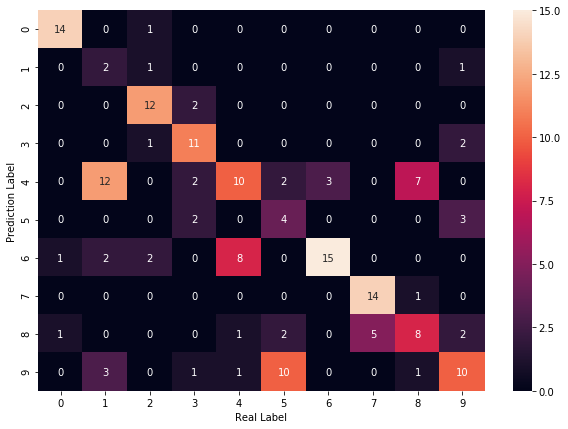

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[1 4 9] real:5
#1 min_error:0 index:[2] real:2
#2 min_error:0 index:[4] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[1 4 9] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1 4 9] real:1
#10 min_error:0 index:[7] real:7
#11 min_error:0 index:[8] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[2] real:3
#14 min_error:1 index:[1 4 9] real:1
#15 min_error:0 index:[5] real:3
#16 min_error:0 index:[8] real:9
#17 min_error:1 index:[1 4 9] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[8] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:1 index:[1 4 9] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:1 index:[0 6 8] real:0
#26 min_error:1 index:[1 4 9] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[6] real:6
#29 min_error:0 index

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.642547928262214
Avg Base Learner:0.8733766233766234


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.3388888888888889
Accuracy on training set: 0.36666666666666664


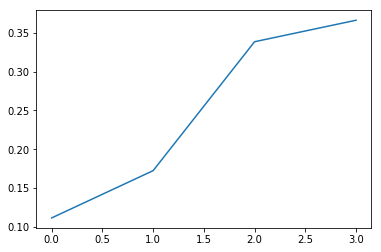

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.1111111111111111,
 0.17222222222222222,
 0.3388888888888889,
 0.36666666666666664]